/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


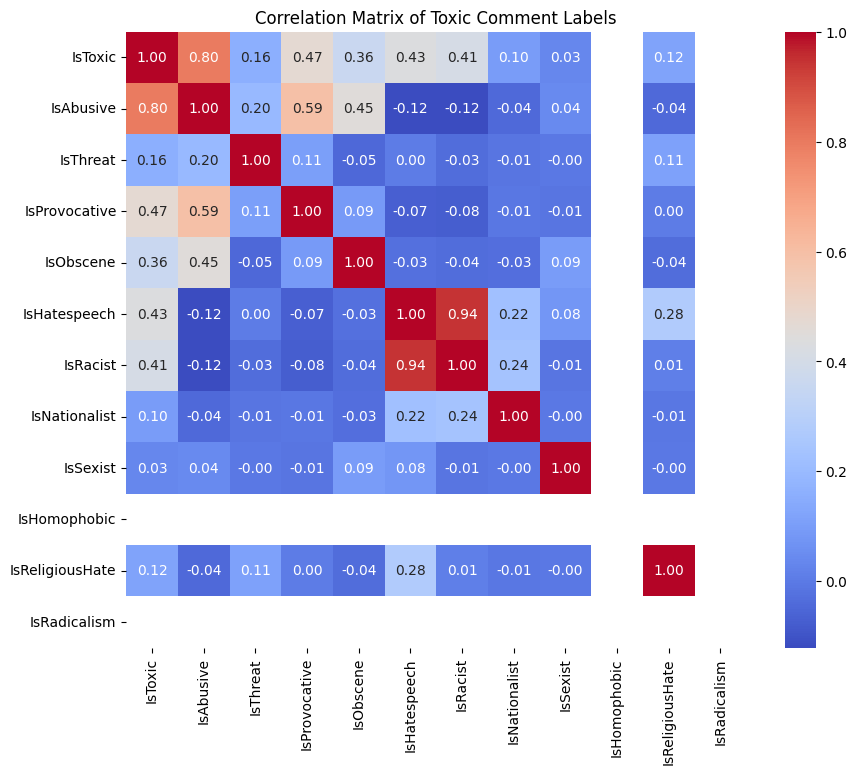

Association Rules:
                   antecedents              consequents  support  confidence  \
10    (IsToxic, IsProvocative)              (IsAbusive)    0.161    1.000000   
19                  (IsRacist)  (IsToxic, IsHatespeech)    0.125    1.000000   
15                 (IsObscene)     (IsToxic, IsAbusive)    0.100    1.000000   
14      (IsObscene, IsAbusive)                (IsToxic)    0.100    1.000000   
13        (IsToxic, IsObscene)              (IsAbusive)    0.100    1.000000   
12             (IsProvocative)     (IsToxic, IsAbusive)    0.161    1.000000   
11  (IsAbusive, IsProvocative)                (IsToxic)    0.161    1.000000   
1                  (IsAbusive)                (IsToxic)    0.353    1.000000   
8                   (IsRacist)           (IsHatespeech)    0.125    1.000000   
18    (IsRacist, IsHatespeech)                (IsToxic)    0.125    1.000000   
7                  (IsObscene)              (IsAbusive)    0.100    1.000000   
6              (IsPro

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Load your dataset.
# Adjust the file name and delimiter as needed (here we assume tab-delimited)
df = pd.read_csv('youtoxic_english_1000.csv')

# 2. Specify the columns containing the binary labels.
# Adjust the list if your dataset uses different names.
binary_cols = [
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
    'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist',
    'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'
]

# Ensure the columns are numeric (0/1) – if not, convert them
df[binary_cols] = df[binary_cols].apply(pd.to_numeric)

# 3. Correlation Analysis
# Calculate the correlation matrix for the toxic label columns
corr_matrix = df[binary_cols].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Toxic Comment Labels")
plt.show()

# 4. Association Rule Mining
# The Apriori algorithm requires the data to be in a one-hot encoded format.
# Since the columns are already binary (0/1), we can apply the algorithm directly.
# Set a minimum support threshold (e.g., 10% of comments) to filter infrequent patterns.
frequent_itemsets = apriori(df[binary_cols], min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets.
# Here we use 'confidence' as our metric with a threshold (e.g., 0.7).
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Sort rules by confidence in descending order and display them.
rules = rules.sort_values(by='confidence', ascending=False)
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
